<a href="https://colab.research.google.com/github/rania751/ACP-k-means/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
# useful for building neural networks then interacting with

import os
# useful for manipulating folders and files

import cv2
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# to manipulate images


import numpy as np
np.random.seed(1000)
# for results reproduceability

import matplotlib.pyplot as plt
# useful for plotting and showing images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/workai/Malaria-BloodCell-dataset/Dataset.zip" -d "/content/drive/MyDrive/workai//output_folder/"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135613_cell_55.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135613_cell_8.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135613_cell_83.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135705_cell_108.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135705_cell_141.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135705_cell_155.png  
  inflating: /content/drive/MyDrive/workai//output_folder/Dataset/Train/Uninfected/C69P30N_ThinF_IMG_20150819_135705_cell_156.png  
  

In [4]:
#we verify that our dataset is balanced
print("number of parasitized cells images= ",len(os.listdir(r"/content/drive/MyDrive/workai/output_folder/Dataset/Train/Parasitized")))
print("number of uninfected cells images=  ",len(os.listdir(r"/content/drive/MyDrive/workai/output_folder/Dataset/Train/Uninfected")))

number of parasitized cells images=  11024
number of uninfected cells images=   11024


In [5]:
SIZE = 64  # our neural nets expect input data of same format so we will use resize our images to (size x size) 

In [6]:

image_datagen = ImageDataGenerator(rescale=1./255)
# 80% de la dataset est pour le training, 10% pour la validation et 10% pour le test
train_generator = image_datagen.flow_from_directory(
    r"/content/drive/MyDrive/workai/output_folder/Dataset/Train", target_size=(64,64), batch_size=8, class_mode='binary')

validation_generator = image_datagen.flow_from_directory(
    r"/content/drive/MyDrive/workai/output_folder/Dataset/Validation", target_size=(64,64), batch_size=8,class_mode='binary')

test_generator = image_datagen.flow_from_directory(
    r"/content/drive/MyDrive/workai/output_folder/Dataset/Test", target_size=(64,64), batch_size=8,class_mode='binary')

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


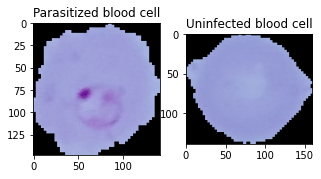

In [10]:
image_directory = r'/content/drive/MyDrive/workai/output_folder/Dataset/Train'
train_parasitized_images = os.listdir(os.path.join(image_directory, 'Parasitized'))
train_uninfected_images = os.listdir(os.path.join(image_directory, 'Uninfected'))


plt.figure(figsize=(5,4)) 

# Left hand side plot
plt.subplot(1,2,1)  # (nRows, nColumns, axes number to plot)
plt.imshow(cv2.imread(os.path.join(image_directory,"Parasitized",train_parasitized_images[0]))) 
plt.title('Parasitized blood cell')  

# Right hand side plot
plt.subplot(1,2,2)
plt.imshow(cv2.imread(os.path.join(image_directory,"Uninfected",train_uninfected_images[0])))
plt.title('Uninfected blood cell')  
plt.show()

In [11]:
INPUT_SHAPE = (64, 64, 3)   #change to (SIZE, SIZE, 3) as all input images must have the same shape

In [12]:
# our deep neural network contains convolutional layers, maxpooling layers
# and BatchNormalisation and dropout layers to deal with overfitting (not genralizing on unseen data )

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=1))

In [13]:
# we compile our model 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# this is a summary of our DNN
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

In [15]:
## Training the model
#Fit the model
history = model.fit(                     
                    train_generator,
                    steps_per_epoch =np.ceil(len(train_generator)),
                    validation_data=validation_generator,
                    validation_steps=np.ceil(len(validation_generator)),
                    epochs=30
                    )

Epoch 1/30
2756/2756 [==============================] - 82s 25ms/step - loss: 0.8173 - accuracy: 0.5714 - val_loss: 0.6921 - val_accuracy: 0.6208
Epoch 2/30
2756/2756 [==============================] - 70s 25ms/step - loss: 0.7504 - accuracy: 0.6070 - val_loss: 0.6277 - val_accuracy: 0.6651
Epoch 3/30
2756/2756 [==============================] - 70s 25ms/step - loss: 0.7221 - accuracy: 0.6215 - val_loss: 0.6220 - val_accuracy: 0.6680
Epoch 4/30
2756/2756 [==============================] - 70s 25ms/step - loss: 0.6952 - accuracy: 0.6319 - val_loss: 0.6045 - val_accuracy: 0.6763
Epoch 5/30
2756/2756 [==============================] - 70s 25ms/step - loss: 0.6821 - accuracy: 0.6401 - val_loss: 0.6028 - val_accuracy: 0.6782
Epoch 6/30
2756/2756 [==============================] - 69s 25ms/step - loss: 0.6617 - accuracy: 0.6481 - val_loss: 0.6123 - val_accuracy: 0.6731
Epoch 7/30
2756/2756 [==============================] - 70s 25ms/step - loss: 0.6498 - accuracy: 0.6576 - val_loss: 0.6041 -

In [16]:
# now we calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(test_generator,steps=np.ceil(len(test_generator)))[1]*100))

345/345 [==============================] - 7s 20ms/step - loss: 0.4274 - accuracy: 0.8084
Test_Accuracy: 80.84%
